In [1]:
from mynotebooks import *
%matplotlib inline

exp = Box2DWorld.ExpSetup(pos_nao=(0,0),pos_obj=(0,2),obj_type="box",salientMode="center",name='human') # minimum
learn = RobotLearning.LearningModel(exp)
nao,obj = exp.nao, exp.obj


-------------------------------------------------
Created Exp Setup  human Debug:  False
Created Learning Model bDebug False


In [2]:
exp.start()
learn.iniExp('twoarmsobj','arm')
learn.load()

Loading RobotLearning Models:  5 folder twoarmsobj strid arm
data/twoarmsobj/arm-model0.data with 1950 tuples
data/twoarmsobj/arm-model1.data with 1909 tuples
load data/twoarmsobj/salient/map0.npy
load data/twoarmsobj/salient/map1.npy
load data/twoarmsobj/salient/map2.npy
load data/twoarmsobj/salient/map3.npy
load data/twoarmsobj/salient/map4.npy
load data/twoarmsobj/salient/map5.npy
load data/twoarmsobj/salient/map6.npy
Loading Salient Point Models
data/twoarmsobj/salient/s0-model0.data with 48310 tuples
data/twoarmsobj/salient/s0-model1.data with 1234 tuples
data/twoarmsobj/salient/s1-model0.data with 37632 tuples
data/twoarmsobj/salient/s1-model1.data with 1040 tuples
data/twoarmsobj/salient/s2-model0.data with 29774 tuples
data/twoarmsobj/salient/s2-model1.data with 400 tuples
data/twoarmsobj/salient/s3-model0.data with 45361 tuples
data/twoarmsobj/salient/s3-model1.data with 1343 tuples
data/twoarmsobj/salient/s4-model0.data with 36191 tuples
data/twoarmsobj/salient/s4-model1.data

setSalientGoal 4 and nao has 6


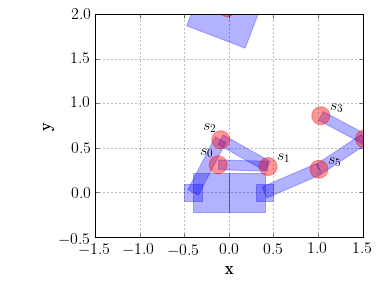

In [7]:
learn.setSalientGoal(iarm=1,isal=4)
learn.myWorldLoop(45)                      # minimum iterations for velocity update 5

# Plotting
plt.close()
fig, ax = VectorFigUtils.makeFigure(axes=[-1.5,1.5,-0.5,2])
Box2DWorld.plotAll(ax,centers=exp.getSalient(),label="s",xlabel="x",ylabel="y",mainfont=16)
plt.show()
fig.savefig('imgs/setup.png', dpi=300, format='png')

In [4]:
salientMap = learn.SM.salientMap
s6 = salientMap[6]
print s6.models[0].size()

0


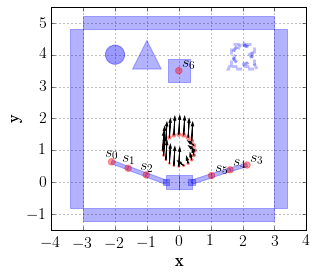

In [28]:
import AffordanceGradients as AG
from VectorFigUtils import drawCircle
exp.start()
exp.setObjPos([0,3.5])

plt.close()
fig, ax = VectorFigUtils.makeFigure()
Box2DWorld.plotAll(ax,centers=exp.getSalient(),label="s",xlabel="x",ylabel="y",mainfont=16)

#Box2DWorld.plotWorld(ax,nao,obj)
#Box2DWorld.plotVectors(ax, exp.getSalient())
#AG.plotAG(ax,exp,learn.SM.salientMap)
salientMap = learn.SM.salientMap
s6 = salientMap[6]


#pobj = np.array(exp.getObjPos())

pobj = np.array([0,1])
v = [1,0]
a, da = 0, 2*np.pi / 20.0
while(a < 2*np.pi):
    va = np.array(VectorFigUtils.vrotate(v,a))
    #p,pf = pobj + 0.7*va, pobj + 0.7*va
    p,pf = pobj + 0.5*va, pobj + 0.5*va
    
    pin = pobj + 0.2*va
    #pin = pobj + [0,0.2]
    vin = -0.1*va
    #vin = [0,0.11]
    tin = np.hstack((pin,vin,pobj))
    imodel = 2
    fv = s6.models[imodel].forward_prediction(tin)
    d = ExplautoUtils.distFwdNN(s6.models[imodel],tin)
    vel = 0.5*np.array(fv[0:2])
    #print s4.models[2].infer([4,5,6,7,8,9],[0,1,2,3],t)
    if(d<0.7):
        drawCircle(ax,p,.1*d,color='r')  
        ax.arrow(pf[0], pf[1], vel[0], vel[1], head_width=0.07, head_length=0.11, fc='k', ec='k')
    a += da
    
plt.show()
fig.savefig('imgs/ag.png', dpi=300, format='png')

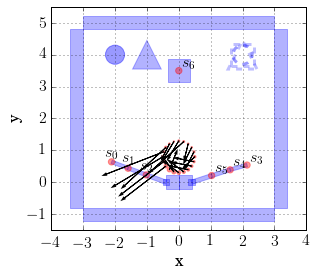

In [20]:
import AffordanceGradients as AG
from VectorFigUtils import drawCircle
exp.start()
exp.setObjPos([0,3.5])

plt.close()
fig, ax = VectorFigUtils.makeFigure()
Box2DWorld.plotAll(ax,centers=exp.getSalient(),label="s",xlabel="x",ylabel="y",mainfont=16)
#AG.plotAG(ax,exp,learn.SM.salientMap)
salientMap = learn.SM.salientMap
s6 = salientMap[6]
AG.plotAG(ax,exp,s6,3,[0,.8])
#AG.plotAG(ax,exp,s4,2,[-1.2,1.2])
#AG.plotAG(ax,exp,s4,2,[0,2])
plt.show()